In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pickle as pkl

In [2]:
file1 = open('X_train.pkl','rb')
file2 = open('y_train.pkl','rb')
file3 = open('X_test.pkl','rb')
file4 = open('y_test.pkl','rb')

X_train = pkl.load(file1)
y_train= pkl.load(file2)
X_test = pkl.load(file3)
y_test = pkl.load(file4)

In [3]:
def load_samples(start,X):
    
    i =0
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    for x in X[start:start+9]:
        ax = list(axes.flatten())[i]
        ax.imshow(x)
        ax.set_title('Image '+str(i+1))
        ax.axis('off')
        i+=1
    plt.show()

In [6]:
def load_samples_r(start,X):
    X_t = np.random.permutation(len(X))
    idx = X_t[start:start+9]
    X_d = X[idx]
    i =0
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    for x in X_d:
        ax = list(axes.flatten())[i]
        ax.imshow(x)
        ax.set_title('Image '+str(i+1))
        ax.axis('off')
        i+=1
    plt.show()

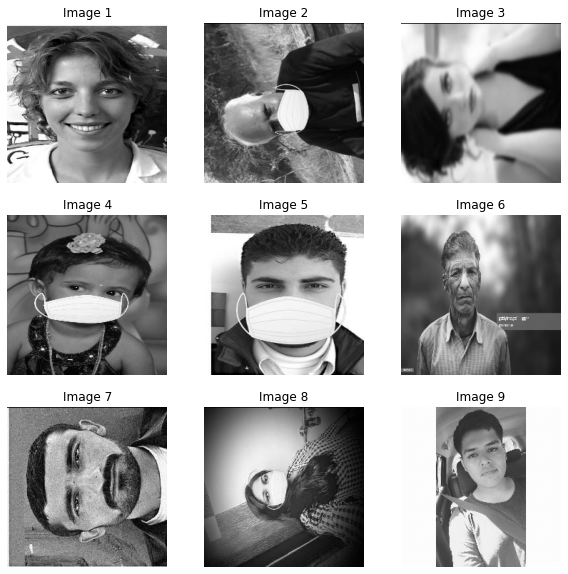

In [7]:
load_samples_r(20,X_train)

In [5]:
X_train, X_val, y_train, y_val = train_test_split(
X_train, y_train, test_size=0.1, random_state=42)

train_idx = np.random.permutation(len(X_train))
val_idx = np.random.permutation(len(X_val))

X_train,y_train = X_train[train_idx],y_train[train_idx]
X_val,y_val = X_val[val_idx],y_val[val_idx]

In [8]:
len(X_train)

3545

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [10]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    fill_mode="nearest"
)


In [13]:
#INIT_LR = 1e-4
EPOCHS = 20
BS = 32

#opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 256)     7168      
_________________________________________________________________
activation_3 (Activation)    (None, 222, 222, 256)     0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 256)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 128)     295040    
_________________________________________________________________
activation_4 (Activation)    (None, 109, 109, 128)     0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 373248)           

In [15]:
%%time
EPOCHS = 20
BS = 32
model.fit(aug.flow(X_train, y_train), 
          batch_size=BS, 
          epochs=EPOCHS,
          validation_data=(X_val,y_val) 
         )# The model takes 49 minutes and 45 seconds to train.


Epoch 1/20
111/111 [==============================] - 598s 5s/step - loss: 1.3271 - accuracy: 0.5080 - val_loss: 0.6913 - val_accuracy: 0.5558
Epoch 2/20
111/111 [==============================] - 599s 5s/step - loss: 0.6934 - accuracy: 0.5238 - val_loss: 0.6937 - val_accuracy: 0.5178
Epoch 3/20
111/111 [==============================] - 595s 5s/step - loss: 0.6918 - accuracy: 0.5258 - val_loss: 0.6852 - val_accuracy: 0.5863
Epoch 4/20
111/111 [==============================] - 594s 5s/step - loss: 0.6860 - accuracy: 0.5295 - val_loss: 0.7144 - val_accuracy: 0.6168
Epoch 5/20
111/111 [==============================] - 593s 5s/step - loss: 0.6861 - accuracy: 0.5351 - val_loss: 0.6935 - val_accuracy: 0.4924
Epoch 6/20
111/111 [==============================] - 593s 5s/step - loss: 0.6935 - accuracy: 0.4781 - val_loss: 0.6927 - val_accuracy: 0.5203
Epoch 7/20
111/111 [==============================] - 589s 5s/step - loss: 0.6932 - accuracy: 0.5080 - val_loss: 0.6943 - val_accuracy: 0.4772

In [7]:
%%time  
x=2
x

Wall time: 0 ns


2

In [16]:
import os.path
if os.path.isfile('models/base.h5') is False:
    model.save('models/base.h5')

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 256)     7168      
_________________________________________________________________
activation_3 (Activation)    (None, 222, 222, 256)     0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 256)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 128)     295040    
_________________________________________________________________
activation_4 (Activation)    (None, 109, 109, 128)     0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 373248)           

In [18]:
from tensorflow.keras.models import load_model
n = load_model('models/base.h5')

In [20]:
n.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 256)     7168      
_________________________________________________________________
activation_3 (Activation)    (None, 222, 222, 256)     0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 256)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 128)     295040    
_________________________________________________________________
activation_4 (Activation)    (None, 109, 109, 128)     0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 373248)           

In [21]:
model.get_weights()

[array([[[[ 1.86464973e-02, -1.43098447e-03, -2.19741650e-02, ...,
           -2.17196625e-02,  3.11131552e-02, -2.45712753e-02],
          [ 3.13805938e-02, -1.20560825e-02, -2.21221596e-02, ...,
            3.69731104e-03, -3.52528058e-02,  6.78533129e-03],
          [-2.72897854e-02,  1.94320735e-02, -3.58388610e-02, ...,
           -4.04142635e-03, -3.28374878e-02,  4.44626808e-03]],
 
         [[-1.25873787e-02,  1.75488112e-03, -1.38779320e-02, ...,
           -2.00028811e-02, -9.71177220e-03, -3.31445560e-02],
          [-4.21474278e-02,  1.80308986e-02, -4.13005762e-02, ...,
           -5.06638698e-02,  4.37815115e-03,  4.70550582e-02],
          [ 2.64780708e-02,  3.37949209e-02,  6.16216240e-03, ...,
            3.08472291e-02, -1.90717168e-02,  5.09300455e-02]],
 
         [[-5.63725196e-02, -3.43819186e-02, -1.12080472e-02, ...,
           -2.79238429e-02,  2.12596096e-02, -3.59778851e-02],
          [ 2.52168402e-02,  2.16803551e-02, -2.94173807e-02, ...,
           -5.614

In [22]:
n.get_weights()

[array([[[[ 1.86464973e-02, -1.43098447e-03, -2.19741650e-02, ...,
           -2.17196625e-02,  3.11131552e-02, -2.45712753e-02],
          [ 3.13805938e-02, -1.20560825e-02, -2.21221596e-02, ...,
            3.69731104e-03, -3.52528058e-02,  6.78533129e-03],
          [-2.72897854e-02,  1.94320735e-02, -3.58388610e-02, ...,
           -4.04142635e-03, -3.28374878e-02,  4.44626808e-03]],
 
         [[-1.25873787e-02,  1.75488112e-03, -1.38779320e-02, ...,
           -2.00028811e-02, -9.71177220e-03, -3.31445560e-02],
          [-4.21474278e-02,  1.80308986e-02, -4.13005762e-02, ...,
           -5.06638698e-02,  4.37815115e-03,  4.70550582e-02],
          [ 2.64780708e-02,  3.37949209e-02,  6.16216240e-03, ...,
            3.08472291e-02, -1.90717168e-02,  5.09300455e-02]],
 
         [[-5.63725196e-02, -3.43819186e-02, -1.12080472e-02, ...,
           -2.79238429e-02,  2.12596096e-02, -3.59778851e-02],
          [ 2.52168402e-02,  2.16803551e-02, -2.94173807e-02, ...,
           -5.614